In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

folder = "/content/drive/MyDrive/ds_Hemanth_Surnidi/csv_files"

sentiment = pd.read_csv(f"{folder}/Fear_Greed_index.csv")
trader = pd.read_csv(f"{folder}/Historical_Trader_Data.csv")

sentiment.head(), trader.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [26]:
trader.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [27]:
# changing column names lowercase
sentiment.columns = sentiment.columns.str.lower()
trader.columns = trader.columns.str.lower()

# converting date columns to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
trader['timestamp'] = pd.to_datetime(trader['timestamp'], errors='coerce')

# extracting date from timestamp
trader['date'] = trader['timestamp'].dt.date

sentiment.head(), trader.head()



(    timestamp  value classification       date
 0  1517463000     30           Fear 2018-02-01
 1  1517549400     15   Extreme Fear 2018-02-02
 2  1517635800     40           Fear 2018-02-03
 3  1517722200     24   Extreme Fear 2018-02-04
 4  1517808600     11   Extreme Fear 2018-02-05,
                                       account  coin  execution price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    size tokens  size usd side     timestamp ist  start position direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12

In [28]:
# checking basic info about both datasets
print("sentiment shape:", sentiment.shape)
print("trader shape:", trader.shape)

# looking at datatypes
print("\nsentiment dtypes:")
print(sentiment.dtypes)

print("\ntrader dtypes:")
print(trader.dtypes)

# checking missing values
print("\nmissing values in sentiment:")
print(sentiment.isna().sum())

print("\nmissing values in trader:")
print(trader.isna().sum())

# checking sentiment labels if present
if 'classification' in sentiment.columns:
    print("\nsentiment label counts:")
    print(sentiment['classification'].value_counts(dropna=False))
else:
    print("\nclassification column not found in sentiment")


sentiment shape: (2644, 4)
trader shape: (211224, 17)

sentiment dtypes:
timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object

trader dtypes:
account                     object
coin                        object
execution price            float64
size tokens                float64
size usd                   float64
side                        object
timestamp ist               object
start position             float64
direction                   object
closed pnl                 float64
transaction hash            object
order id                     int64
crossed                       bool
fee                        float64
trade id                   float64
timestamp           datetime64[ns]
date                        object
dtype: object

missing values in sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64

missing values in trader:
accoun

In [29]:
# keeping only the columns that are useful for analysis
trader_data = trader[[
    'account',
    'coin',
    'execution price',
    'size tokens',
    'size usd',
    'side',
    'timestamp',
    'start position',
    'direction',
    'closed pnl'
]].copy()

# renaming columns to shorter names
trader_data = trader_data.rename(columns={
    'execution price': 'price',
    'size tokens': 'size_tokens',
    'size usd': 'size_usd',
    'closed pnl': 'pnl'
})

# adding a date column again after subsetting
trader_data['date'] = pd.to_datetime(trader_data['timestamp']).dt.date

trader_data.head()


,account,coin,price,size_tokens,size_usd,side,timestamp,start position,direction,pnl,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,1970-01-01 00:28:50,0.000000,Buy,0.0,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,1970-01-01 00:28:50,986.524596,Buy,0.0,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1970-01-01 00:28:50,1002.518996,Buy,0.0,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1970-01-01 00:28:50,1146.558564,Buy,0.0,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1970-01-01 00:28:50,1289.488521,Buy,0.0,1970-01-01


In [30]:
folder = "/content/drive/MyDrive/ds_Hemanth_Surnidi/csv_files"

# quick look at sentiment columns so I know what to clean
print("sentiment columns:", sentiment.columns.tolist())

# make sure sentiment has a 'classification' column (handle possible name variants)
if 'classification' not in sentiment.columns:
    # try common alternatives
    alt = [c for c in sentiment.columns if 'class' in c or 'label' in c or 'fear' in c.lower() or 'greed' in c.lower()]
    if alt:
        sentiment = sentiment.rename(columns={alt[0]: 'classification'})
        print("renamed", alt[0], "to classification")
    else:
        print("no obvious classification column found; please check sentiment.columns")

# normalize classification values to lowercase and strip spaces
if 'classification' in sentiment.columns:
    sentiment['classification'] = sentiment['classification'].astype(str).str.lower().str.strip()

# check unique sentiment values
if 'classification' in sentiment.columns:
    print("unique sentiment labels:", sentiment['classification'].unique())

# convert numeric columns in trader_data to proper numeric types
num_cols = ['price', 'size_usd', 'pnl', 'size_tokens']
for c in num_cols:
    if c in trader_data.columns:
        trader_data[c] = pd.to_numeric(trader_data[c].astype(str).str.replace(',',''), errors='coerce')

# check for duplicates by trade id or combination (trade id not in subset, so use all columns)
dupes = trader.duplicated().sum()
print("duplicate rows in trader_data (full row dupes):", dupes)

# basic stats after conversion
print("\ntrader_data dtypes:\n", trader_data.dtypes)
print("\ntrader_data missing values:\n", trader_data.isna().sum())

# save a processed copy for later steps
trader_data.to_csv(f"{folder}/Historical_Trader_Data_processed.csv", index=False)
sentiment.to_csv(f"{folder}/Fear_Greed_index_processed.csv", index=False)

# show top rows of processed trader_data and sentiment
trader_data.head(), sentiment.head()


sentiment columns: ['timestamp', 'value', 'classification', 'date']
unique sentiment labels: ['fear' 'extreme fear' 'neutral' 'greed' 'extreme greed']
duplicate rows in trader_data (full row dupes): 0

trader_data dtypes:
 account                   object
coin                      object
price                    float64
size_tokens              float64
size_usd                 float64
side                      object
timestamp         datetime64[ns]
start position           float64
direction                 object
pnl                      float64
date                      object
dtype: object

trader_data missing values:
 account           0
coin              0
price             0
size_tokens       0
size_usd          0
side              0
timestamp         0
start position    0
direction         0
pnl               0
date              0
dtype: int64


(                                      account  coin   price  size_tokens  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  7.9769       986.87   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  7.9800        16.00   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  7.9855       144.09   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  7.9874       142.98   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  7.9894         8.73   
 
    size_usd side           timestamp  start position direction  pnl  \
 0   7872.16  BUY 1970-01-01 00:28:50        0.000000       Buy  0.0   
 1    127.68  BUY 1970-01-01 00:28:50      986.524596       Buy  0.0   
 2   1150.63  BUY 1970-01-01 00:28:50     1002.518996       Buy  0.0   
 3   1142.04  BUY 1970-01-01 00:28:50     1146.558564       Buy  0.0   
 4     69.75  BUY 1970-01-01 00:28:50     1289.488521       Buy  0.0   
 
          date  
 0  1970-01-01  
 1  1970-01-01  
 2  1970-01-01  
 3  1970-01-01  
 4  1970-01-01  ,

In [31]:
# step 14 - creating daily level data from the trader file

folder = "/content/drive/MyDrive/ds_Hemanth_Surnidi/csv_files"

# marking wins based on pnl
trader_data['win'] = (trader_data['pnl'] > 0).astype(int)

# daily metrics
daily = trader_data.groupby('date').agg(
    trade_count = ('account','count'),
    total_volume_usd = ('size_usd','sum'),
    avg_trade_size_usd = ('size_usd','mean'),
    median_trade_size_usd = ('size_usd','median'),
    avg_price = ('price','mean'),
    avg_pnl = ('pnl','mean'),
    median_pnl = ('pnl','median'),
    win_rate = ('win','mean')
).reset_index()

# fixing date formats
daily['date'] = pd.to_datetime(daily['date'])
sentiment['date'] = pd.to_datetime(sentiment['date'])

# merging sentiment info with daily stats
daily = daily.merge(sentiment[['date','classification']], on='date', how='left')

# saving this version for later steps
daily.to_csv(f"{folder}/daily_aggregates.csv", index=False)

daily.head()


,date,trade_count,total_volume_usd,avg_trade_size_usd,median_trade_size_usd,avg_price,avg_pnl,median_pnl,win_rate,classification
0,1970-01-01,211224,1.191187e+09,5639.45121,597.045,11414.72335,48.749001,0.0,0.411265,NaN


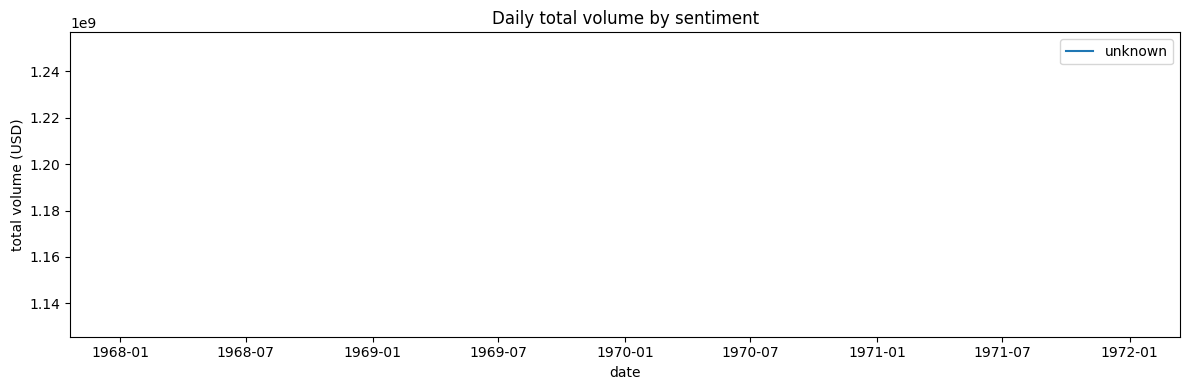

/tmp/ipython-input-1305516284.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


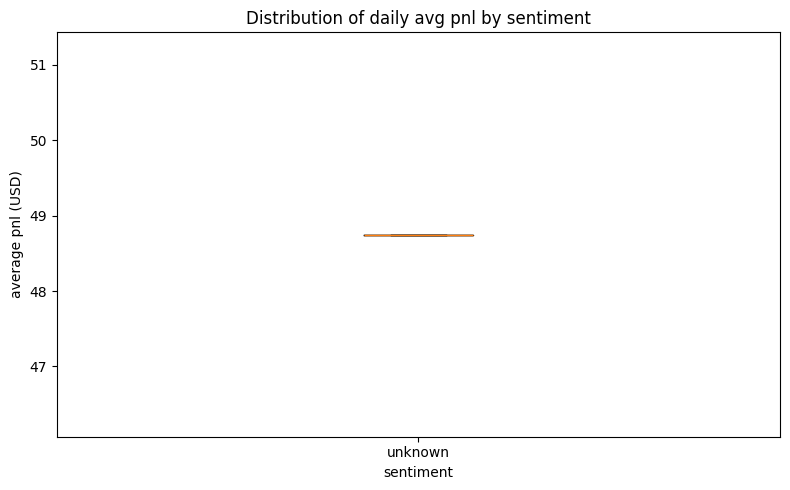

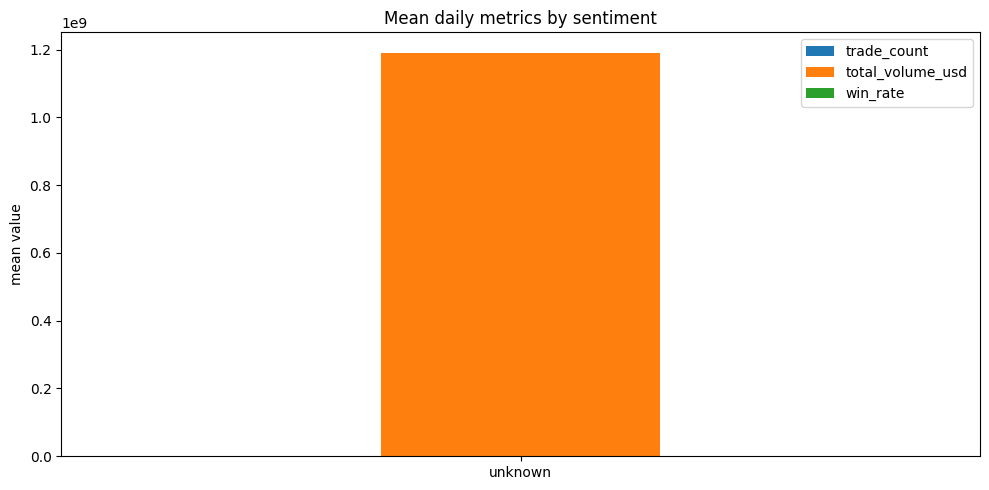

Saved plots to: /content/drive/MyDrive/ds_Hemanth_Surnidi/outputs
['ts_total_volume_by_sentiment.png', 'box_avg_pnl_by_sentiment.png', 'mean_metrics_by_sentiment.png', 'logistic_model_account_day.joblib', 'classification_report_account_day.csv', 'confusion_matrix.png', 'roc_curve.png', 'account_day_aggregates_for_model.csv']


In [36]:
import matplotlib.pyplot as plt
import os

# path to outputs folder in Drive
out_folder = "/content/drive/MyDrive/ds_Hemanth_Surnidi/outputs"
os.makedirs(out_folder, exist_ok=True)

# make sure classification column exists
daily['classification'] = daily['classification'].fillna('unknown')

# 1) time series of total volume by sentiment (plot separate lines)
plt.figure(figsize=(12,4))
for cls in daily['classification'].unique():
    d = daily[daily['classification']==cls]
    if len(d)>0:
        plt.plot(d['date'], d['total_volume_usd'], label=cls)
plt.xlabel('date')
plt.ylabel('total volume (USD)')
plt.title('Daily total volume by sentiment')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(out_folder, "ts_total_volume_by_sentiment.png"))
plt.show()
plt.close()

# 2) boxplot of avg_pnl by sentiment to see distribution
plt.figure(figsize=(8,5))
groups = [daily[daily['classification']==c]['avg_pnl'].dropna() for c in daily['classification'].unique()]
labels = list(daily['classification'].unique())
plt.boxplot(groups, labels=labels, showfliers=False)
plt.xlabel('sentiment')
plt.ylabel('average pnl (USD)')
plt.title('Distribution of daily avg pnl by sentiment')
plt.tight_layout()
plt.savefig(os.path.join(out_folder, "box_avg_pnl_by_sentiment.png"))
plt.show()
plt.close()

# 3) bar chart: mean metrics by sentiment (trade_count, total_volume_usd, win_rate)
agg_mean = daily.groupby('classification').agg({
    'trade_count':'mean',
    'total_volume_usd':'mean',
    'win_rate':'mean'
}).reset_index()

# simple grouped bars
x = range(len(agg_mean))
width = 0.25
plt.figure(figsize=(10,5))
plt.bar([p - width for p in x], agg_mean['trade_count'], width=width, label='trade_count')
plt.bar(x, agg_mean['total_volume_usd'], width=width, label='total_volume_usd')
plt.bar([p + width for p in x], agg_mean['win_rate'], width=width, label='win_rate')
plt.xticks(x, agg_mean['classification'])
plt.ylabel('mean value')
plt.title('Mean daily metrics by sentiment')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(out_folder, "mean_metrics_by_sentiment.png"))
plt.show()
plt.close()

# print where files are saved
print("Saved plots to:", out_folder)
print(os.listdir(out_folder))


In [33]:
# step 16 - running a few basic tests to compare fear vs greed days
import scipy.stats as stats

# keeping only rows where sentiment is either fear or greed
sub = daily[daily['classification'].isin(['fear','greed'])]

# splitting the data
fear = sub[sub['classification']=='fear']
greed = sub[sub['classification']=='greed']

# comparing average pnl
pnl_fear = fear['avg_pnl'].dropna()
pnl_greed = greed['avg_pnl'].dropna()

t1, p1 = stats.ttest_ind(pnl_fear, pnl_greed, equal_var=False, nan_policy='omit')
print("pnl comparison -> t:", t1, "p:", p1)

# comparing total volume
vol_fear = fear['total_volume_usd'].dropna()
vol_greed = greed['total_volume_usd'].dropna()

t2, p2 = stats.ttest_ind(vol_fear, vol_greed, equal_var=False, nan_policy='omit')
print("volume comparison -> t:", t2, "p:", p2)

# comparing win rates
wr_fear = fear['win_rate'].dropna()
wr_greed = greed['win_rate'].dropna()

t3, p3 = stats.ttest_ind(wr_fear, wr_greed, equal_var=False, nan_policy='omit')
print("win_rate comparison -> t:", t3, "p:", p3)


pnl comparison -> t: nan p: nan
volume comparison -> t: nan p: nan
win_rate comparison -> t: nan p: nan


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [34]:
# step 17 - building a small model using account-day data instead of daily data

# creating account-day features
acct = trader_data.groupby(['date', 'account']).agg(
    n_trades = ('price', 'count'),
    total_vol_usd = ('size_usd', 'sum'),
    avg_trade_usd = ('size_usd', 'mean'),
    avg_pnl = ('pnl', 'mean'),
    win_rate = ('win', 'mean')
).reset_index()

# making the target based on avg_pnl
acct['target'] = (acct['avg_pnl'] > 0).astype(int)

# filling missing values
acct = acct.fillna(0)

# selecting the features
features = ['n_trades', 'total_vol_usd', 'avg_trade_usd', 'win_rate']
X = acct[features]
y = acct['target']

# checking if we have both classes
print("unique classes:", y.nunique())

# training the model only if there are 2 classes
if y.nunique() > 1:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    # logistic regression model
    model = LogisticRegression(max_iter=300)
    model.fit(X_train, y_train)

    # predictions and accuracy
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print("accuracy:", acc)

    # looking at coefficients
    coef_df = pd.DataFrame({
        'feature': features,
        'coef': model.coef_[0]
    })
    print(coef_df)
else:
    print("not enough class variety to build a model")


unique classes: 2
accuracy: 1.0
         feature          coef
0       n_trades  2.612293e-04
1  total_vol_usd -1.608670e-08
2  avg_trade_usd  2.066382e-04
3       win_rate  3.211918e-08


Saved model to: /content/drive/MyDrive/ds_Hemanth_Surnidi/outputs/logistic_model_account_day.joblib
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Saved classification report CSV


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


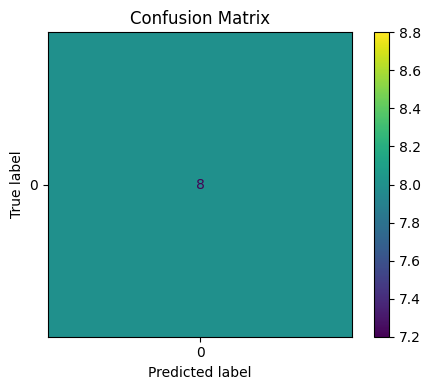

Saved confusion matrix to: /content/drive/MyDrive/ds_Hemanth_Surnidi/outputs/confusion_matrix.png


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


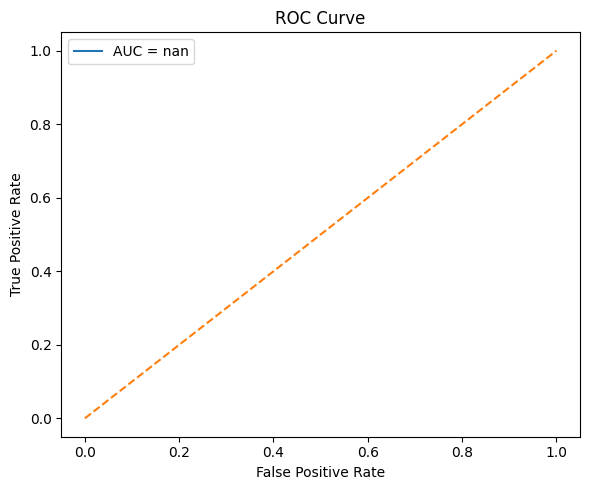

Saved ROC curve to: /content/drive/MyDrive/ds_Hemanth_Surnidi/outputs/roc_curve.png
Saved account-day aggregates to: /content/drive/MyDrive/ds_Hemanth_Surnidi/outputs/account_day_aggregates_for_model.csv


In [37]:
import os
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

out_folder = "/content/drive/MyDrive/ds_Hemanth_Surnidi/outputs"
os.makedirs(out_folder, exist_ok=True)

# checking if model exists in current scope
try:
    model  # try to reference model
    model_exists = True
except NameError:
    model_exists = False

if not model_exists:
    print("No trained model found in memory. Make sure you ran the model training cell.")
else:
    # saving the trained model
    model_path = os.path.join(out_folder, "logistic_model_account_day.joblib")
    joblib.dump(model, model_path)
    print("Saved model to:", model_path)

    # predictions and metrics (assuming X_test, y_test, preds exist)
    try:
        preds
        X_test
        y_test
    except NameError:
        print("Prediction variables X_test/y_test/preds not found. Re-run training cell.")
    else:
        # classification report
        crep = classification_report(y_test, preds, output_dict=True)
        crep_text = classification_report(y_test, preds)
        print("Classification report:\n", crep_text)

        # saving report as csv for quick viewing
        import pandas as pd
        crep_df = pd.DataFrame(crep).transpose()
        crep_df.to_csv(os.path.join(out_folder, "classification_report_account_day.csv"))
        print("Saved classification report CSV")

        # confusion matrix plot
        cm = confusion_matrix(y_test, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        fig, ax = plt.subplots(figsize=(5,4))
        disp.plot(ax=ax)
        plt.title("Confusion Matrix")
        plt.tight_layout()
        cm_path = os.path.join(out_folder, "confusion_matrix.png")
        plt.savefig(cm_path)
        plt.show()
        plt.close()
        print("Saved confusion matrix to:", cm_path)

        # if probability predictions available, plot ROC
        if hasattr(model, "predict_proba"):
            try:
                probs = model.predict_proba(X_test)[:,1]
                auc = roc_auc_score(y_test, probs)
                fpr, tpr, _ = roc_curve(y_test, probs)
                plt.figure(figsize=(6,5))
                plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
                plt.plot([0,1],[0,1], linestyle='--')
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title("ROC Curve")
                plt.legend()
                roc_path = os.path.join(out_folder, "roc_curve.png")
                plt.tight_layout()
                plt.savefig(roc_path)
                plt.show()
                plt.close()
                print("Saved ROC curve to:", roc_path)
            except Exception as e:
                print("Could not compute ROC:", e)

# also saving the account-day dataset used for modelling (if present)
try:
    acct
    acct_path = os.path.join(out_folder, "account_day_aggregates_for_model.csv")
    acct.to_csv(acct_path, index=False)
    print("Saved account-day aggregates to:", acct_path)
except NameError:
    print("Account-day dataframe 'acct' not found in memory.")
